# Font Classifier with FastAI
#### Add Cyclical LR to find learning rate

In [1]:
# Put these at the top of every notebook, to get automatic reloading and inline plotting
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [5]:
# This file contains all the main external libs we'll use
from fastai.imports import *

from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

PATH = "data/"
sz=225
arch=resnet50
bs=28

In [27]:
tfms = tfms_from_model(arch, sz, aug_tfms=transforms_side_on, max_zoom=1.1)
data = ImageClassifierData.from_paths(PATH, tfms=tfms, bs=bs, num_workers=4)
learn = ConvLearner.pretrained(arch, data, precompute=True, ps=0.5)

In [7]:
learn.fit(1e-2, 1)
learn.precompute=False

[0.      1.54202 1.23649 0.52871]                           



In [28]:
learn.precompute=False

In [26]:
learn.fit(1e-2, 2, cycle_len=1)

[0.      1.51428 1.32132 0.50862]                           
[1.      1.39363 1.19625 0.54367]                           



In [27]:
tfms = tfms_from_model(arch, sz, aug_tfms=transforms_side_on, max_zoom=1.1)
data = ImageClassifierData.from_paths(PATH, tfms=tfms, bs=bs, num_workers=4)
learn = ConvLearner.pretrained(arch, data, precompute=True, ps=0.5)

In [29]:
learn.unfreeze()
lr=np.array([1e-4,1e-3,1e-2])

In [30]:
learn.fit(lr, 6, cycle_len=1)

[0.      1.05857 0.88758 0.6628 ]                           
[1.      0.69731 0.59468 0.77709]                            
[2.      0.51771 0.45974 0.84326]                            
[3.      0.4064  0.35457 0.86119]                            
[4.      0.34457 0.32807 0.87547]                            
[5.      0.26355 0.24554 0.91429]                            



## Cyclical LR

In [31]:
tfms = tfms_from_model(arch, sz, aug_tfms=transforms_side_on, max_zoom=1.1)
data = ImageClassifierData.from_paths(PATH, tfms=tfms, bs=bs, num_workers=4)
learn = ConvLearner.pretrained(arch, data, precompute=False, ps=0.5)

In [32]:
learn.unfreeze()

[0.      1.1141  0.92326 0.65431]                           
[1.      0.73155 0.61338 0.74555]                            
[2.      0.55777 0.41326 0.83302]                            
[3.      0.50602 0.45322 0.8465 ]                            
[4.      0.33796 0.29433 0.88504]                            
[5.      0.26738 0.2018  0.92574]                            
[6.      0.20942 0.21905 0.91429]                            



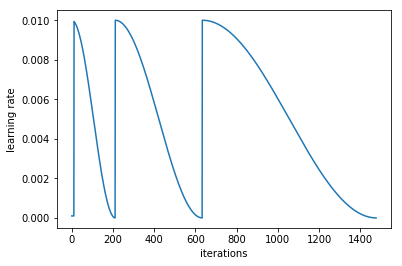

In [33]:
lr=np.array([1e-4,1e-3,1e-2])

learn.fit(lr, 3, cycle_len=1, cycle_mult=2)

# Another trick we've used here is adding the `cycle_mult` parameter. Take a look at the following chart, and see if you can figure out what the parameter is doing:

learn.sched.plot_lr()

In [34]:
learn.save('224_all_50')

In [35]:
learn.load('224_all_50')

In [36]:
data.classes

['lato',
 'merriweather',
 'montserrat',
 'open-sans',
 'oswald',
 'raleway',
 'roboto']

## Analyzing results

In [37]:
log_preds,y = learn.TTA()
preds = np.mean(np.exp(log_preds),0)

In [38]:
log_preds.shape, preds.shape

((5, 1476, 7), (1476, 7))

In [39]:
y.shape

(1476,)

In [40]:
preds = np.argmax(preds, axis=1)
# probs = probs[:,1]

In [41]:
cm = confusion_matrix(y, preds)

[[200   0   3   3   0   3   7]
 [  0  94   0   0   0   0   2]
 [  3   0 423   1   0   5   0]
 [  4   0   0 105   0   0  11]
 [  0   0   0   0 179   0   1]
 [  3   0  18   0   0 195   0]
 [  3   0   0   3   2   2 206]]


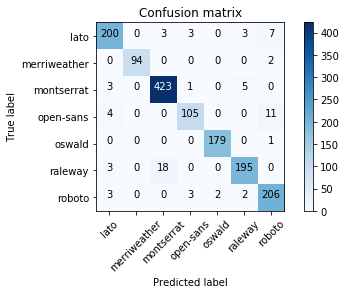

In [42]:
plot_confusion_matrix(cm, data.classes)